### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [25]:
import pandas as pd

df = pd.read_csv('aug14.csv') # local file
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [26]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Group by date and count the number of pickups
pickup_counts = df.groupby(df['Date/Time'].dt.date).size()
#display(pickup_counts)

# Find the date with the highest number of pickups
date_with_most_pickups = pickup_counts.idxmax()

formatted_date = date_with_most_pickups.strftime("%Y-%m-%d")
display(formatted_date)
#Ans:2014-08-07    32759

'2014-08-07'

#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [27]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
pickup_counts = df['Date/Time'].dt.date.value_counts()

# Get the count of pickups on the highest date
date_with_most_pickups = pickup_counts.idxmax()
highest_pickups = df[df['Date/Time'].dt.date == date_with_most_pickups]

pickup_count_highest_date = highest_pickups.shape[0]

display(pickup_count_highest_date)

32759

#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [28]:
# Count the number of unique TLC base companies
unique = df['Base'].nunique()

# Print the result
display(unique)



5

#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [29]:
# Group by TLC base company and count the number of pickups
base_company = df['Base'].value_counts()

# Find the TLC base company with the highest number of pickups
base_highest_pickups = base_company.idxmax()
display(base_highest_pickups)

'B02617'

#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [30]:
# Group by TLC base company and count the number of pickups
base_pickup_counts = df.groupby('Base').size()
display(base_pickup_counts)


Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
dtype: int64

#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [31]:
# Extract the hour from the 'Date/Time' column

df['Hour'] = df['Date/Time'].dt.hour
# Group by hour and count the number of pickups
pickup_by_hour = df['Hour'].value_counts()

display(pickup_by_hour)

# Find the hour with the highest number of pickups
busiest_hour = pickup_by_hour.idxmax()

display(busiest_hour)

#ans:17:00 -5:00PM

Hour
17    57122
18    55390
16    53481
19    53008
20    51674
21    51354
15    48197
22    46008
14    40644
13    35764
8     34566
7     34064
23    33609
12    32106
11    31778
10    30706
9     30195
6     24907
0     21451
5     16525
1     14471
4     11774
3     10376
2     10105
Name: count, dtype: int64

17

#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

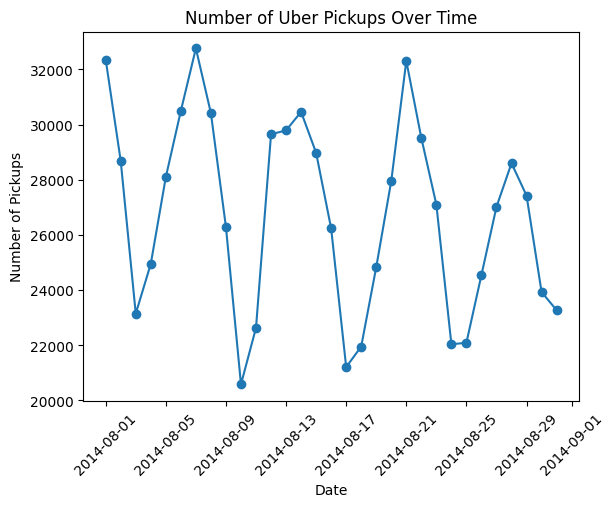

In [32]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups

pickup_counts_by_date = df.groupby(df['Date/Time'].dt.date).size()
# Create a line plot to visualize the number of pickups over time
plt.plot(pickup_counts_by_date.index, pickup_counts_by_date.values,marker='o')

plt.xlabel('Date')
plt.ylabel('Number of Pickups')
plt.title('Number of Uber Pickups Over Time')

plt.xticks(rotation=45)
plt.show()



In [33]:
# df['BinnedHour'] = df['Date/Time'].dt.floor('15min')
# plt.figure(figsize=(14,7))
# df['BinnedHour'].value_counts().sort_index().plot(c='darkblue', alpha=0.8)
# plt.title("Number of Uber Pickups Over Time")
# plt.xlabel("Date/Time")
# plt.ylabel('Number of Pickups')
# plt.show()


#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

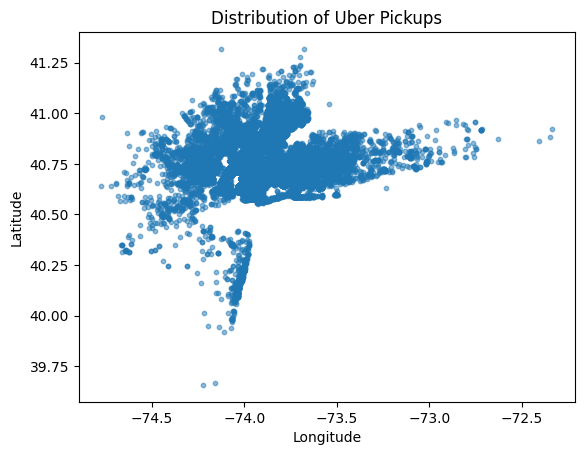

In [34]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
import matplotlib.pyplot as plt

plt.scatter(df['Lon'], df['Lat'], s=10, alpha=0.5)#alpha controls opacity


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of Uber Pickups')


plt.show()

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

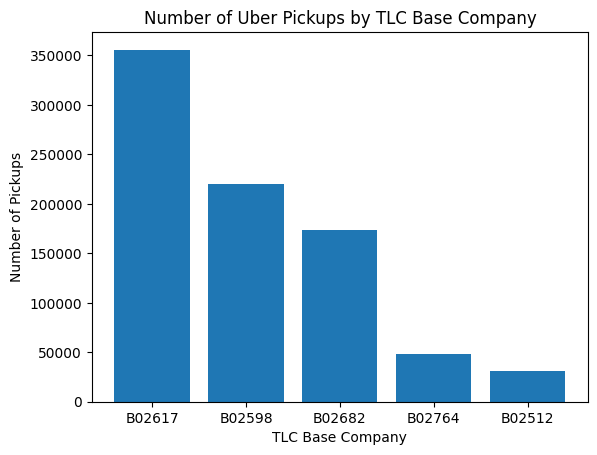

In [35]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
pickup_counts_by_base = df['Base'].value_counts()

plt.bar(pickup_counts_by_base.index, pickup_counts_by_base.values)

plt.xlabel('TLC Base Company')
plt.ylabel('Number of Pickups')
plt.title('Number of Uber Pickups by TLC Base Company')


plt.xticks(rotation=360)
plt.show()

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

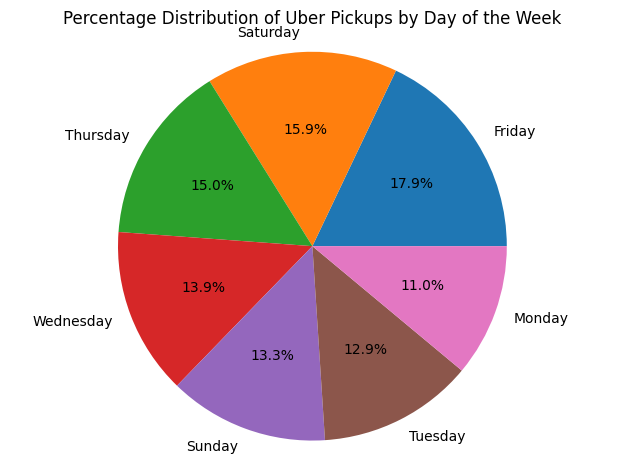

In [36]:
# Group by day of the week and count the number of pickups
df['DayOfWeek'] = df['Date/Time'].dt.day_name()
pickup_counts_by_day = df['DayOfWeek'].value_counts()

# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
plt.figure()
plt.pie(pickup_counts_by_day, labels=pickup_counts_by_day.index,autopct='%1.1f%%')#This parameter controls the formatting of the percentage values displayed on the pie chart. %1.1f
plt.title('Percentage Distribution of Uber Pickups by Day of the Week')
plt.axis('equal')
plt.tight_layout()
plt.show()